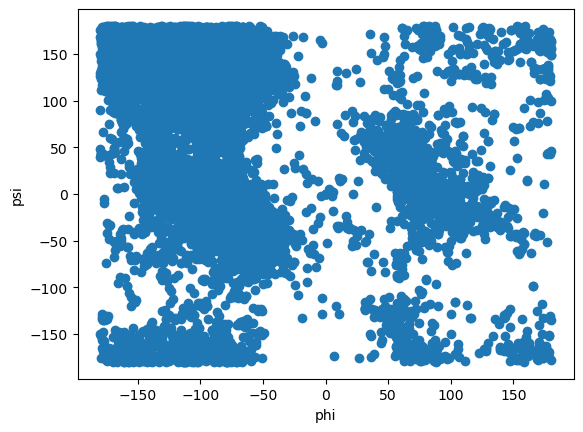

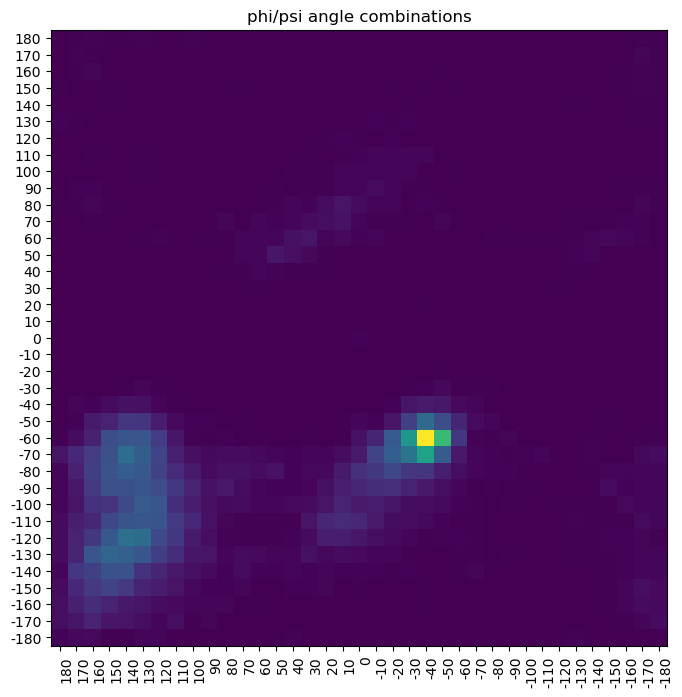

In [1]:
# Mattias Retteli & Aaron Sandgren - Group 67

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


residues = pd.read_csv("./datasets/assignment3-data-1.csv")

# Part A
# Get the phi and psi values from the dataset
phi = residues['phi']
psi = residues['psi']

plt.ylabel('psi');
plt.xlabel('phi');
plt.scatter(phi,psi)
plt.show()


# create a two dimensional array of zeroes
data = np.zeros((37,37))
# count the occurances of each angle combination in terms
# 180 : 170 : 160 : 150 ... 0 : -10 : -20....

# loop over the phi and psi pairs
for phiv,psiv in zip(phi.tolist(),psi.tolist()):
    
    # Round the numbers down to max two numbers , 180 -> 18, 12.75 -> 1, to allow us to use it as an index in the matrix
    phir = round(phiv/10) 
    psir = round(psiv/10)
   
    # variable for the phi index when inserting into the matrix
    phi_index = 0
    # if the angle is 0, we want to add it in the middle of the matrix since it goes from 180 -> - 180
    if phir == 0:
        phi_index = 18
    # if the angle is more than 0 we want to inverse the place in the matrix since an angle of 180 should be in the index 0
    elif phir > 0:
        phi_index = 18 - phir
    # if the angle is less than 0 we want to push it to the second half of the matrix, 
    #-160 degrees should be 16 indices after the middle
    elif phir < 0:
        phi_index = 18 + abs(phir)
    
    # same for psi as for phi
    psi_index = 0
    if psir == 0:
        psi_index = 18
    elif psir > 0:
        psi_index = 18 - psir
    elif psir < 0:
        psi_index = 18 + abs(psir)
    
    # increase the occurance count of the angle pair in the matrix
    data[phi_index,psi_index] = data[phi_index,psi_index] + 1
   


fig, ax = plt.subplots()
im = ax.imshow(data)
# create the lables for 180 -> -180
label = []
for i in range(37):
    label.append("" + str(180 - i*10))

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(label)), labels=label)
ax.set_yticks(np.arange(len(label)), labels=label)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")


ax.set_title("phi/psi angle combinations")
fig.set_size_inches(15, 8)
plt.show()
# plotting inspired from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

0.6674392423283723

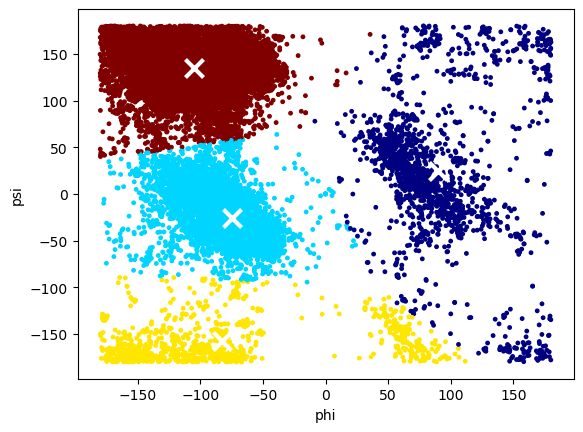

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
from numpy import random

# Convert to a 2d np.array from our dataset
X = np.array(list(map(lambda x, y: [x, y], phi, psi)))

# This was used to limit the dataset when experimenting
#for i in range(28000):
#    tmp = random.randint(len(X))
    
    #X = np.delete(X, tmp, axis=0)
      
# Perform kmeans 
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
color = kmeans.predict(X)
# print the plot with colors
plt.scatter(X[:, 0], X[:, 1], c=color, s=6, cmap="jet_r")

# calculate and display the silhouette score
display(metrics.silhouette_score(X, color, metric='euclidean', sample_size=None, random_state=None))

# Find the cluster centers and add them to the plot
centroids = kmeans.cluster_centers_
plt.ylabel('psi');
plt.xlabel('phi');
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)



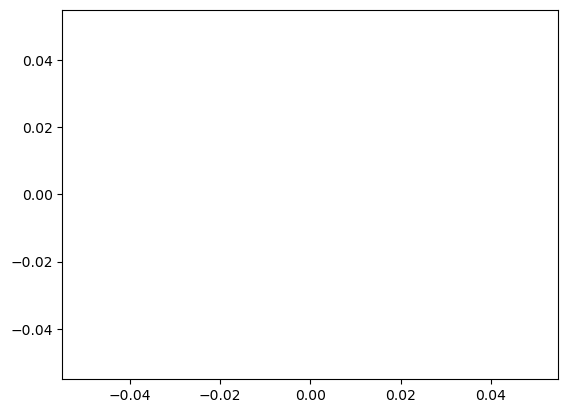

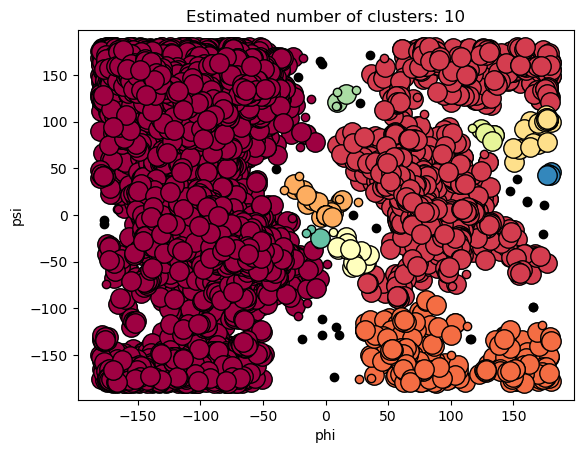

,residue name,position,chain,phi,psi,lable
1461,ASN,149,D,-2.688591,-128.899534,-1
2652,ALA,56,A,-2.863239,-111.508315,-1
2916,THR,38,A,21.787603,-0.151098,-1
3949,THR,38,G,-177.161178,-9.990774,-1
4931,ASN,65,4,152.463939,38.202112,-1
5045,GLY,96,A,165.282126,-98.857575,-1
5289,GLY,96,B,165.344635,-98.745692,-1
6830,GLY,1,G,10.971306,-128.616482,-1
6904,TYR,76,H,-21.893765,148.189361,-1
8224,ARG,3,B,27.876134,119.562711,-1


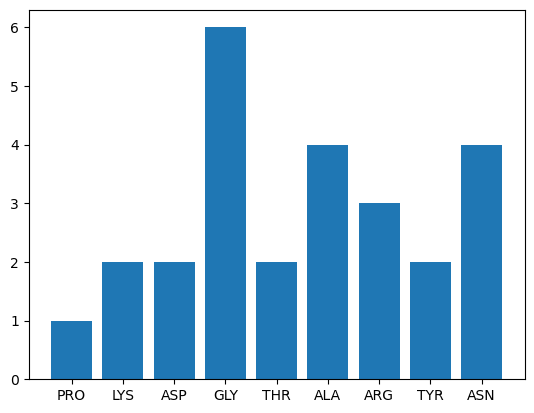

In [3]:
from sklearn.cluster import DBSCAN
from math import sqrt

# Function to calculate the distance between two points
def distance(point1: list, point2: list):
    x = point2[0] - point1[0]
    y = point2[1] - point1[1]
    lol = abs(x+y)
    return list(np.sqrt([lol]))[0]

# Array to hold the mean distance between one point and its three nearest neighbours
mean_distances = []

# for each pair of points
for point1 in X:
    break # This operation takes a very long time(30 min~), remove comment if you want to check the results 
    # Hold the distance for the three closest points
    closest = []
    for point2 in X:
        # continue if they are the same point
        if point1[0] == point2[0] and point1[1] == point2[1]: continue
        # initialize the array with the three first values
        if len(closest) < 3: 
            closest.append(distance(point1, point2))
        # See if the current distance is less than any in the closest array and update if neccesary
        else:
            dist = distance(point1, point2)
            index = 0
            longest_distance = 1000
            for i, val in enumerate(closest):
                if longest_distance > val: 
                    index = i
                    longest_distance = val
            closest[i] = longest_distance
    # save the mean distance after we have iterated over all points
    mean_distances.append((closest[0] + closest[1] + closest[2]) /3 )          
    
mean_distances = sorted(mean_distances)
# create x array which is used to display the values where x is just counted upwards.
e_xs = []
for i in range(len(mean_distances)):
    e_xs.append(i)
    
plt.scatter(e_xs, mean_distances)
plt.show()


# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

# Perform the dbscan and print it
db = DBSCAN(eps=14, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.ylabel('psi');
plt.xlabel('phi');
plt.show()

# Add new column to dataset with the lables
residues["lable"] = labels
noise = residues[residues["lable"] < 0]
display(noise)

# Create a new list with only the noise points
names = list(set(noise["residue name"]))
occurrences = np.zeros(len(set(noise["residue name"])))

# Count the number of occurences
for name in noise["residue name"]:
    occurrences[names.index(name)] += 1
    
plt.bar(names, occurrences)

plt.show()



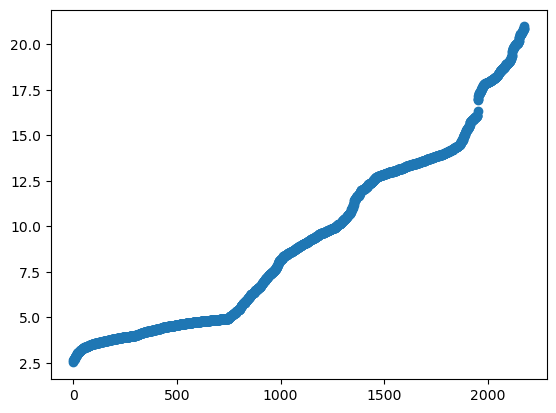

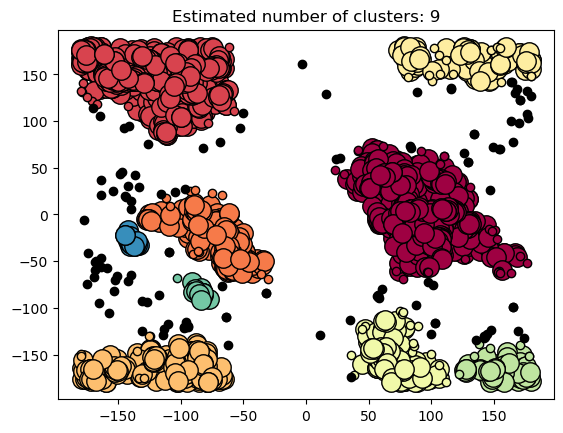

In [4]:
# Sort out only the GLY residues from the original dataset
residuesp = residues[residues['residue name'] == 'GLY']
phip = residuesp['phi']
psip = residuesp['psi']

X = np.array(list(map(lambda x, y: [x, y], phip, psip)))

# Perform the same elbow method again but this time on the reduced dataset

# Array to hold the mean distance between one point and its three nearest neighbours
mean_distances = []

# for each pair of points
for point1 in X:
    #break # This operation takes a very long time(30 min~), comment out if you want to check the results 
    # Hold the distance for the three closest points
    closest = []
    for point2 in X:
        # continue if they are the same point
        if point1[0] == point2[0] and point1[1] == point2[1]: continue
        # initialize the array with the three first values
        if len(closest) < 3: 
            closest.append(distance(point1, point2))
        # See if the current distance is less than any in the closest array and update if neccesary
        else:
            dist = distance(point1, point2)
            index = 0
            longest_distance = 1000
            for i, val in enumerate(closest):
                if longest_distance > val: 
                    index = i
                    longest_distance = val
            closest[i] = longest_distance
    # save the mean distance after we have iterated over all points
    mean_distances.append((closest[0] + closest[1] + closest[2]) /3 )          
    
mean_distances = sorted(mean_distances)
# create x array which is used to display the values where x is just counted upwards.
e_xs = []
for i in range(len(mean_distances)):
    e_xs.append(i)
    
plt.scatter(e_xs, mean_distances)
plt.show()




# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
db = DBSCAN(eps=15, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

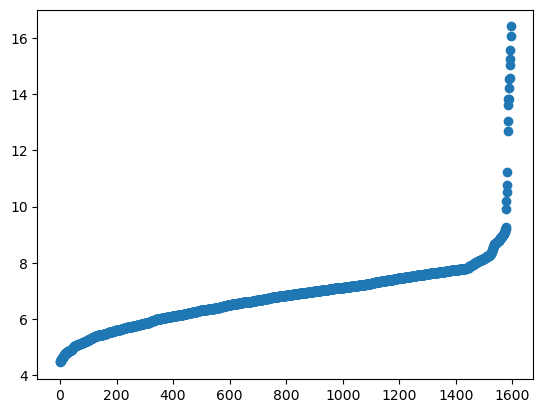

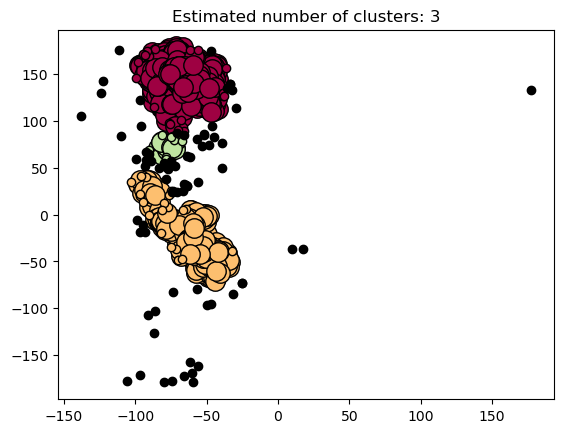

In [5]:
# Sort out only the PRO residues from the original dataset
residuesp = residues[residues['residue name'] == 'PRO']
phip = residuesp['phi']
psip = residuesp['psi']

X = np.array(list(map(lambda x, y: [x, y], phip, psip)))

# Perform the same elbow method again but this time on the reduced dataset

# Array to hold the mean distance between one point and its three nearest neighbours
mean_distances = []

# for each pair of points
for point1 in X:
    #break 
    # Hold the distance for the three closest points
    closest = []
    for point2 in X:
        # continue if they are the same point
        if point1[0] == point2[0] and point1[1] == point2[1]: continue
        # initialize the array with the three first values
        if len(closest) < 3: 
            closest.append(distance(point1, point2))
        # See if the current distance is less than any in the closest array and update if neccesary
        else:
            dist = distance(point1, point2)
            index = 0
            longest_distance = 1000
            for i, val in enumerate(closest):
                if longest_distance > val: 
                    index = i
                    longest_distance = val
            closest[i] = longest_distance
    # save the mean distance after we have iterated over all points
    mean_distances.append((closest[0] + closest[1] + closest[2]) /3 )          
    
mean_distances = sorted(mean_distances)
# create x array which is used to display the values where x is just counted upwards.
e_xs = []
for i in range(len(mean_distances)):
    e_xs.append(i)
    
plt.scatter(e_xs, mean_distances)
plt.show()




# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
db = DBSCAN(eps=8, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()